In [3]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/Cora1218/pandas/main/store_sales.csv')
df1=pd.read_csv('https://raw.githubusercontent.com/Cora1218/pandas/main/date_info.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/Cora1218/pandas/main/store_info.csv')

u=pd.merge(df, df1, how='inner', left_on='sales_datetime', right_on='calendar_date')
u

df3=(u[u.holiday_flg==1])
a=df3.groupby(['id'])[['sales_count']].aggregate('mean')

b=a.nlargest(5, ['sales_count']) 

c=pd.merge(df2,b,left_on='store_id', right_on='id')
c.columns = ['Store_id','Store_type','Zone_name', 'Latitude', 'Longitude', 'Average']
by_average = c.sort_values('Average', ascending=False)
by_average.style.set_caption("*******  Five stores that have the highest average number of sales on holidays     *******")


,Store_id,Store_type,Zone_name,Latitude,Longitude,Average
2,89e7328af22efe74,HOT & COLD,CHH,25.740365,-100.398843,6.538462
3,bb09595bab7d5cfb,HOT,CUN,21.120597,-86.764775,5.142857
0,831658500aa7c846,HOT,VER,19.100574,-96.107823,5.000000
4,24b9b2a020826ede,HOT & COLD,GDL,20.644773,-103.412269,4.896552
1,db80363d35f10926,HOT & COLD,GDL,20.644773,-103.412269,4.844828


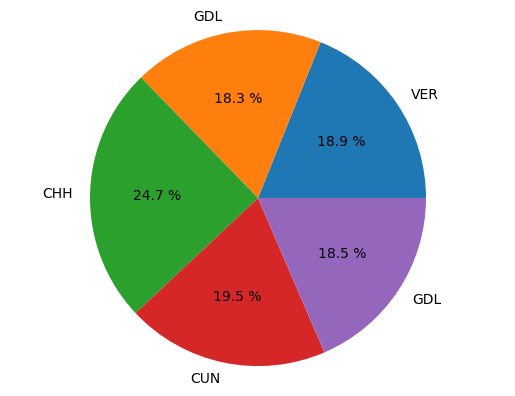

In [9]:
import matplotlib.pyplot as plt
store = c['Zone_name']
average = c['Average']

plt.pie(average, labels=store, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

